In [7]:
import pandas as pd
import os
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Lectura base de datos

In [8]:
data_path = r"D:\DANE - Contrato\2024\Operativo Barrido\Data"
emicron_mov = pd.read_csv(os.path.join(data_path,"emicron_moviles.csv"),header = 0)
emicron_mov = emicron_mov[emicron_mov['OLA']==2022].reset_index(drop=True)
emicron_mov.drop('OLA',axis=1,inplace=True)

In [9]:
emicron_mov.head()

,id,VENTAS_MES_ANTERIOR,POTTOT,REMUNERACION_TOTAL,CYG,COD_DEPTO,CPAM,GRUPOS4,ANOS_ESPACIO
0,212005312,3600000,0.0,0.0,2690000,8,0,3,5
1,212051311,1020000,2.0,0.0,540000,44,0,4,1
2,212052713,600000,0.0,0.0,150000,44,0,4,2
3,212056411,3900000,0.0,0.0,3200000,44,0,3,5
4,212061211,150000,0.0,0.0,50000,44,0,3,2


In [17]:
# from pycaret.anomaly import *

In [21]:
# emicron_mov.set_index('id',inplace = True, drop = True)

# emicron_data = setup(emicron_mov,
#                      categorical_features= ['COD_DEPTO','GRUPOS4'],
#                      ordinal_features = {'ANOS_ESPACIO' : [1, 2, 3, 4,5]},
#                    session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(3056, 8)"
2,Transformed data shape,"(3056, 34)"
3,Ordinal features,1
4,Numeric features,6
5,Categorical features,2
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [22]:
emicron_data.dataset_transformed.columns

Index(['VENTAS_MES_ANTERIOR', 'POTTOT', 'REMUNERACION_TOTAL', 'CYG',
       'COD_DEPTO_8.0', 'COD_DEPTO_44.0', 'COD_DEPTO_47.0', 'COD_DEPTO_70.0',
       'COD_DEPTO_20.0', 'COD_DEPTO_18.0', 'COD_DEPTO_41.0', 'COD_DEPTO_68.0',
       'COD_DEPTO_76.0', 'COD_DEPTO_19.0', 'COD_DEPTO_17.0', 'COD_DEPTO_63.0',
       'COD_DEPTO_73.0', 'COD_DEPTO_66.0', 'COD_DEPTO_5.0', 'COD_DEPTO_11.0',
       'COD_DEPTO_13.0', 'COD_DEPTO_15.0', 'COD_DEPTO_23.0', 'COD_DEPTO_27.0',
       'COD_DEPTO_50.0', 'COD_DEPTO_52.0', 'COD_DEPTO_54.0', 'COD_DEPTO_25.0',
       'COD_DEPTO_88.0', 'CPAM', 'GRUPOS4_3.0', 'GRUPOS4_4.0', 'GRUPOS4_2.0',
       'ANOS_ESPACIO'],
      dtype='object')

In [10]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder

In [11]:
emicron_ohe = emicron_mov.copy()

ohe_dpto = OneHotEncoder().fit(emicron_ohe[['COD_DEPTO']])
drop_enc = ohe_dpto.transform(emicron_ohe[['COD_DEPTO']]).toarray()
drop_enc_df = pd.DataFrame(drop_enc,columns = ohe_dpto.get_feature_names_out())
#drop_enc_df.drop('COD_DEPTO_5', axis=1, inplace = True) # Utilizar como categoría de referencia 5: Antioquia

emicron_ohe = emicron_ohe.join(drop_enc_df)

ohe_sector = OneHotEncoder().fit(emicron_ohe[['GRUPOS4']])
drop_enc = ohe_sector.transform(emicron_ohe[['GRUPOS4']]).toarray()
drop_enc_df = pd.DataFrame(drop_enc,columns = ohe_sector.get_feature_names_out())
#drop_enc_df.drop('GRUPOS4_2', axis=1, inplace = True) # Utilizar como categoría de referencia 2: Industria Manufacturera

emicron_ohe = emicron_ohe.join(drop_enc_df)

In [12]:
emicron_ohe.drop(['COD_DEPTO','GRUPOS4'],axis=1, inplace= True) 
emicron_ohe.set_index('id',inplace = True, drop = True)

In [13]:
emicron_ohe.head()

,VENTAS_MES_ANTERIOR,POTTOT,REMUNERACION_TOTAL,CYG,CPAM,ANOS_ESPACIO,COD_DEPTO_5,COD_DEPTO_8,COD_DEPTO_11,COD_DEPTO_13,...,COD_DEPTO_63,COD_DEPTO_66,COD_DEPTO_68,COD_DEPTO_70,COD_DEPTO_73,COD_DEPTO_76,COD_DEPTO_88,GRUPOS4_2,GRUPOS4_3,GRUPOS4_4
id,,,,,,,,,,,,,,,,,,,,,
212005312,3600000,0.0,0.0,2690000,0,5,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
212051311,1020000,2.0,0.0,540000,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212052713,600000,0.0,0.0,150000,0,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212056411,3900000,0.0,0.0,3200000,0,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
212061211,150000,0.0,0.0,50000,0,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
def descriptive_stat_threshold(df, pred_score, threshold, opcion = 1):
    # Observemos cuántos 0 o 1 hay
    if opcion == 1:    
        df = pd.DataFrame(df)
        df['Anomaly_Score'] = pred_score
        df['Group'] = np.where(df['Anomaly_Score'] < threshold, 'Normal', 'Outlier')
        # Ahora mostraremos las estadísticas resumen
        cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns = {'Anomaly_Score': 'Count'})
        # Conto del conteo
        cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100
        # Promedio
        stat = df.groupby('Group').mean().round(2).reset_index()
        # Poniendo el conteo y el promedio juntos
        stat = cnt.merge(stat, left_on = 'Group', right_on = 'Group')
        return(stat)
    else:
        df = pd.DataFrame(df)
        df['Anomaly_Score'] = pred_score
        df['Group'] = np.where(df['Anomaly_Score'] < threshold, 'Outlier', 'Normal')
        return(df)

In [78]:
from sklearn.ensemble        import IsolationForest
from sklearn.model_selection import GridSearchCV

# Parameters
k_sam = [256, 500, 800, 1000]
k_tree = [100,250, 500,1000]

#Almacenar los resultados
iscores_mult = np.zeros([emicron_ohe.shape[0], (len(k_sam)*len(k_tree))])

i = 0

for sam in k_sam:
    for n_tree in k_tree:
        ifo = IsolationForest(random_state = 123,
                              contamination=0.1,
                              max_features= 34,
                              verbose=1,
                              n_jobs=-1,
                              max_samples= sam,
                              n_estimators= n_tree)
        ifo.fit(emicron_ohe)
        iscores_mult[:, i] = ifo.decision_function(emicron_ohe)
        i +=1

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.2s remaining:    0.9s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.6s remaining:    1.9s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    1.3s remaining:    4.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


In [79]:
iscores_mult.shape

(3056, 16)

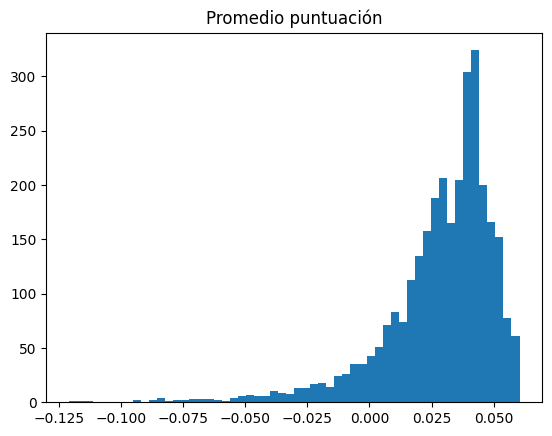

In [74]:
# El promedio de las predicciones de los 10 puntajes están en y_by_average abajo. Se crea esto en un histograma
# El resultado "y_by_average" es una columna:
Y_by_average = np.mean(iscores_mult,axis=1)
plt.hist(Y_by_average, bins = 'auto')
#plt.xlim(4.2, 8)
plt.title("Promedio puntuación")
plt.show()

In [75]:
threshold = np.percentile(np.sort(Y_by_average), 10) 
threshold

0.0007403013571692877

In [92]:
np.mean(Y_by_average)

0.02830876527288553

In [80]:
iforest_res = descriptive_stat_threshold(emicron_mov, Y_by_average, threshold, 2)

In [83]:
iforest_res.to_csv(os.path.join(data_path,"atpcs_iforest_movil.csv"), index = False)

In [77]:
iforest_res.tail()

,id,VENTAS_MES_ANTERIOR,POTTOT,REMUNERACION_TOTAL,CYG,COD_DEPTO,CPAM,GRUPOS4,ANOS_ESPACIO,Anomaly_Score,Group
3051,727639411,5400000,0.0,0.0,4500000,23,0,3,5,0.004840,Normal
3052,727653612,1600000,0.0,0.0,1080000,23,1,3,5,0.038191,Normal
3053,727666312,740000,1.0,0.0,440000,63,1,4,1,0.025110,Normal
3054,727672111,3000000,0.0,0.0,2821000,63,1,2,5,-0.014283,Outlier
3055,727696611,2400000,0.0,0.0,1926000,23,1,4,5,0.029405,Normal


In [43]:
iforest_res['Group'].value_counts()

Normal     2750
Outlier     306
Name: Group, dtype: int64

In [91]:
iforest_res['Group'][(iforest_res['CPAM']==0) & (iforest_res['GRUPOS4']==3) & (iforest_res['ANOS_ESPACIO']==3)].value_counts()

Normal     30
Outlier     3
Name: Group, dtype: int64

In [65]:
Iforest = IsolationForest(max_samples='auto', 
                          random_state = 123,
                          contamination=.5,
                          max_features= 34,
                          n_estimators=500,
                          verbose=1,
                          n_jobs=-1)

In [66]:
Iforest.fit(emicron_ohe)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.5s remaining:    1.8s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.6s finished


IsolationForest(contamination=0.5, max_features=34, n_estimators=500, n_jobs=-1,
                random_state=123, verbose=1)

In [67]:
y_pred = Iforest.predict(emicron_ohe)
y_pred_adjusted = [1 if x == -1 else 0 for x in y_pred]
sum(y_pred_adjusted)

1527

In [68]:
score = Iforest.score_samples(emicron_ohe)

(array([   2.,    6.,   13.,   21.,   39.,   74.,  203.,  505., 1195.,
         998.]),
 array([-0.53600932, -0.51836282, -0.50071633, -0.48306984, -0.46542334,
        -0.44777685, -0.43013035, -0.41248386, -0.39483736, -0.37719087,
        -0.35954437]),
 <BarContainer object of 10 artists>)

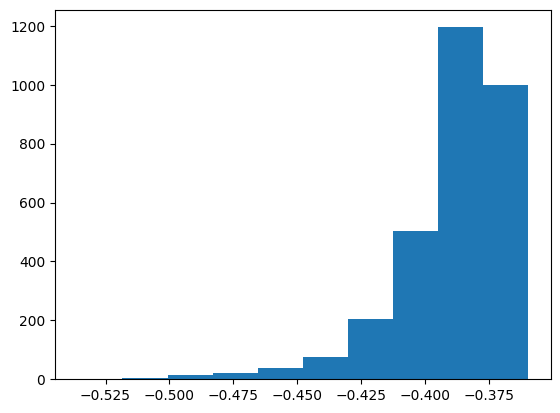

In [69]:
plt.hist(score)

In [70]:
np.percentile(np.sort(score), 50) 

-0.3830785834863141

In [71]:
len(score[score < np.percentile(np.sort(score), 50) ])

1527